## **Long Short Term Memory (LSTM)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('air.csv')

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


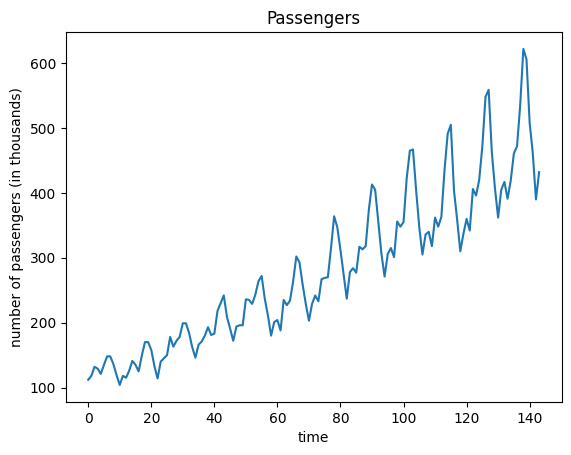

In [5]:
dataset = data.iloc[:, 1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers (in thousands)')
plt.title('Passengers')
plt.show()

## Preprocessing Data

Reshape

In [6]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype('float32')
dataset.shape

(144, 1)

# Scaling:

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
dataset = scaler.fit_transform(dataset)

# Train Test Split:

In [9]:
train_size = int(len(dataset)*0.5)
test_size = len(dataset)- train_size

train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

print('train size: {}, test size: {}'.format(len(train), len(test)))

train size: 72, test size: 72


In [10]:
dataX = []
datay = []
timestemp = 10

for i in range(len(train)- timestemp -1):
    a = train[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(train[i + timestemp, 0])


trainX, trainy = np.array(dataX), np.array(datay)

In [11]:
dataX = []
datay = []
for i in range(len(test)- timestemp -1):
    a = test[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(test[i + timestemp, 0])


testX, testy = np.array(dataX), np.array(datay)

In [12]:
trainX.shape

(61, 10)

In [13]:
trainX = np.reshape(trainX, (trainX.shape[0],1,  trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,  testX.shape[1]))

In [14]:
trainX.shape

(61, 1, 10)

## Create LSTM Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [16]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, timestemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainy, epochs=50, batch_size=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0277
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 16/50
61/61 ━━━━━━━━━━━━

## **Prediction**

In [17]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainy])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([testy])

import math
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainy[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testy[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score: 16.79 RMSE
Test Score: 56.97 RMSE


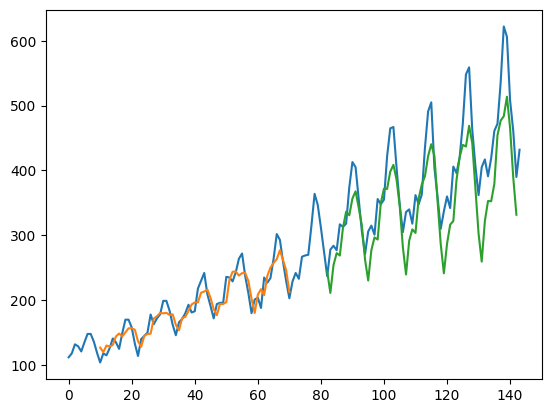

In [18]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestemp:len(trainPredict)+timestemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()